# A Data-Driven Approach to Understanding Cybersecurity Risks with UNODC Insights

## Introduction and set up

UNODC: https://dataunodc.un.org/dp-crime-corruption-offences
World Bank internet usage: https://data.worldbank.org/indicator/IT.NET.USER.ZS
Secure internet servers: https://data.worldbank.org/indicator/IT.NET.SECR
Secure Internet servers per 1 million people: https://data.worldbank.org/indicator/IT.NET.SECR.P6

### Package Loading

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

## Load the datasets

In [67]:
# Create paths to datasets
file_path_un = "/content/drive/MyDrive/data_cts_corruption_and_economic_crime.xlsx"
file_path_wb = "/content/drive/MyDrive/world_bank.xlsx"

# Load the sheet names to understand the structure
xls_un = pd.ExcelFile(file_path_un)
xls_wb = pd.ExcelFile(file_path_wb)

print('<----Sheets of UNODC dataset---->')
print(xls_un.sheet_names)
print('<----Sheets of World Bank dataset---->')
print(xls_wb.sheet_names)

<----Sheets of UNODC dataset---->
['data_cts_corruption_and_economi']
<----Sheets of World Bank dataset---->
['Internet users (% of population', 'Secure Severs (absolute)', 'Secure servers (per 1 million)']


In [3]:
df = pd.read_excel(xls_un, sheet_name="data_cts_corruption_and_economi")

# Display the first few rows to understand the structure
df.head()

,UNODC,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,16/05/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source
2,ARM,Armenia,Asia,Western Asia,Offences,by type of offence,Corruption,Total,Total,2013,Counts,782,CTS
3,AUT,Austria,Europe,Western Europe,Offences,by type of offence,Corruption,Total,Total,2013,Counts,3439,CTS
4,CHE,Switzerland,Europe,Western Europe,Offences,by type of offence,Corruption,Total,Total,2013,Counts,4884,CTS


In [4]:
# Rename columns based on the second row (index 1)
df.columns = df.iloc[1]
df = df[2:].reset_index(drop=True)

In [5]:
# Rename columns for easier reference
df.columns = ["Iso3_code", "Country", "Region", "Subregion", "Indicator",
              "Dimension", "Category", "Sex", "Age", "Year",
              "Unit", "Value", "Source"]

In [6]:
# Convert Year and Value columns to numeric types
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Value"] = pd.to_numeric(df["Value"], errors="coerce")

In [7]:
df["Category"].unique()

array(['Corruption', 'Corruption: Bribery',
       'Corruption: Other acts of corruption', 'Smuggling of migrants',
       'Burglary', 'Theft', 'Theft: of a motorized vehicle', 'Fraud',
       'Fraud: Cyber-related (Cy)', 'Money laundering',
       'Unlawful access to a computer system',
       'Unlawful interference with a computer system or computer data',
       'Unlawful interception or access of computer data',
       'Acts that cause environmental pollution or degradation',
       'Acts involving the movement of dumping of waste',
       'Trade or possession of protected or prohibited species of faune and flora',
       'Acts that result in the depletion of degradation of natural resources'],
      dtype=object)

In [8]:
cyber_crime_categories = [
    "Fraud: Cyber-related (Cy)",
    "Unlawful access to a computer system",
    "Unlawful interference with a computer system or computer data",
    "Unlawful interception or access of computer data"
]

df_cyber = df[df["Category"].isin(cyber_crime_categories)].copy()

In [9]:
df_cyber.head()

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit,Value,Source
8467,ARM,Armenia,Asia,Western Asia,Offences,by type of offence,Fraud: Cyber-related (Cy),Total,Total,2013,Counts,35.0,CTS
8468,AUT,Austria,Europe,Western Europe,Offences,by type of offence,Fraud: Cyber-related (Cy),Total,Total,2013,Counts,7667.0,CTS
8469,CAN,Canada,Americas,Northern America,Offences,by type of offence,Fraud: Cyber-related (Cy),Total,Total,2013,Counts,6914.0,CTS
8470,COL,Colombia,Americas,Latin America and the Caribbean,Offences,by type of offence,Fraud: Cyber-related (Cy),Total,Total,2013,Counts,7303.0,CTS
8471,CZE,Czechia,Europe,Eastern Europe,Offences,by type of offence,Fraud: Cyber-related (Cy),Total,Total,2013,Counts,1740.0,CTS


In [10]:
summary = pd.DataFrame({
    'Data Type': df_cyber.dtypes,
    'Missing Values': df_cyber.isnull().sum(),
    'Unique Values': df_cyber.nunique(),
})


In [11]:
print("=== COLUMN SUMMARY ===")
print(summary)


=== COLUMN SUMMARY ===
          Data Type  Missing Values  Unique Values
Iso3_code    object               0             93
Country      object               0             93
Region       object               0              4
Subregion    object               0             13
Indicator    object               0              1
Dimension    object               0              1
Category     object               0              4
Sex          object               0              1
Age          object               0              1
Year          int64               0             10
Unit         object               0              2
Value       float64               0           1628
Source       object               0              5


In [12]:
# Display numeric summary stats (mean, median, etc.)
numeric_summary = df_cyber.describe(include='number').T

In [13]:
print("\n=== NUMERIC SUMMARY ===")
print(numeric_summary)


=== NUMERIC SUMMARY ===
        count         mean           std     min          25%          50%  \
Year   2426.0  2018.083265      2.301876  2013.0  2016.000000  2018.000000   
Value  2426.0  2671.366553  18430.230688     0.0     0.428535     7.199874   

          75%       max  
Year   2020.0    2022.0  
Value   136.0  255717.0  


In [14]:
# List columns with only one unique value
single_value_cols = summary[summary['Unique Values'] == 1].index.tolist()

print("Columns with only one unique value:")
print(single_value_cols)

Columns with only one unique value:
['Indicator', 'Dimension', 'Sex', 'Age']


In [15]:
for col in single_value_cols:
    unique_val = df_cyber[col].unique()
    print(f"{col}: {unique_val}")

Indicator: ['Offences']
Dimension: ['by type of offence']
Sex: ['Total']
Age: ['Total']


In [16]:
# Drop columns with only one unique value
cols_to_drop = ['Indicator', 'Dimension', 'Sex', 'Age']
df_cyber_cleaned = df_cyber.drop(columns=cols_to_drop)

# View cleaned dataframe
print(df_cyber_cleaned.head())

     Iso3_code   Country    Region                        Subregion  \
8467       ARM   Armenia      Asia                     Western Asia   
8468       AUT   Austria    Europe                   Western Europe   
8469       CAN    Canada  Americas                 Northern America   
8470       COL  Colombia  Americas  Latin America and the Caribbean   
8471       CZE   Czechia    Europe                   Eastern Europe   

                       Category  Year    Unit   Value Source  
8467  Fraud: Cyber-related (Cy)  2013  Counts    35.0    CTS  
8468  Fraud: Cyber-related (Cy)  2013  Counts  7667.0    CTS  
8469  Fraud: Cyber-related (Cy)  2013  Counts  6914.0    CTS  
8470  Fraud: Cyber-related (Cy)  2013  Counts  7303.0    CTS  
8471  Fraud: Cyber-related (Cy)  2013  Counts  1740.0    CTS  


In [17]:
df_cyber_cleaned = df_cyber_cleaned.reset_index(drop=True)

# World Bank Data

['Internet users (% of population', 'Secure Severs (absolute)', 'Secure servers (per 1 million)']


In [19]:
df_internet_users = pd.read_excel(xls_wb, sheet_name="Internet users (% of population")
df_absolute_servers = pd.read_excel(xls_wb, sheet_name="Secure Severs (absolute)")
df_relative_servers = pd.read_excel(xls_wb, sheet_name="Secure servers (per 1 million)")

In [20]:
# Display the first few rows to understand the structure
df_internet_users.head(1)
df_relative_servers.head(1)
df_absolute_servers.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Secure Internet servers,IT.NET.SECR,NaN,NaN,NaN,NaN,NaN,NaN,...,59.0,79.0,123.0,103.0,122.0,149.0,169.0,177.0,174.0,150.0


In [21]:
df_absolute_servers.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

In [22]:
# Melt the dataframe to long format
df_internet_users_long = df_internet_users.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year",
    value_name="Internet_Usage"
)

df_absolute_servers_long = df_absolute_servers.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year",
    value_name="Secure Internet servers"
)

df_relative_servers_long = df_relative_servers.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year",
    value_name="Secure Internet servers (per 1 million people)"
)

In [23]:
# Convert 'Year' to integer
df_internet_users_long["Year"] = pd.to_numeric(df_internet_users_long["Year"], errors="coerce")
df_absolute_servers_long["Year"] = pd.to_numeric(df_absolute_servers_long["Year"], errors="coerce")
df_relative_servers_long["Year"] = pd.to_numeric(df_relative_servers_long["Year"], errors="coerce")

In [24]:
# Show first 3 rows of new data frame
df_internet_users_long.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Internet_Usage
0,Aruba,ABW,Individuals using the Internet (% of population),IT.NET.USER.ZS,1960,NaN
1,Africa Eastern and Southern,AFE,Individuals using the Internet (% of population),IT.NET.USER.ZS,1960,NaN
2,Afghanistan,AFG,Individuals using the Internet (% of population),IT.NET.USER.ZS,1960,NaN


In [25]:
# Show first 3 rows of new data frame
df_absolute_servers_long.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Secure Internet servers
0,Aruba,ABW,Secure Internet servers,IT.NET.SECR,1960,NaN
1,Africa Eastern and Southern,AFE,Secure Internet servers,IT.NET.SECR,1960,NaN
2,Afghanistan,AFG,Secure Internet servers,IT.NET.SECR,1960,NaN


In [26]:
# Show first 3 rows of new data frame
df_relative_servers_long.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Secure Internet servers (per 1 million people)
0,Aruba,ABW,Secure Internet servers (per 1 million people),IT.NET.SECR.P6,1960,NaN
1,Africa Eastern and Southern,AFE,Secure Internet servers (per 1 million people),IT.NET.SECR.P6,1960,NaN
2,Afghanistan,AFG,Secure Internet servers (per 1 million people),IT.NET.SECR.P6,1960,NaN


In [27]:
# Keep only the relevant columns
df_internet_users_long = df_internet_users_long[["Country Code", "Year", "Internet_Usage"]].copy()
df_internet_users_long.rename(columns={"Country Code": "Iso3_code"}, inplace=True)

In [28]:
# Keep only the relevant columns
df_relative_servers_long = df_relative_servers_long[["Country Code", "Year", "Secure Internet servers (per 1 million people)"]].copy()
df_relative_servers_long.rename(columns={"Country Code": "Iso3_code"}, inplace=True)

In [29]:
# Keep only the relevant columns
df_absolute_servers_long = df_absolute_servers_long[["Country Code", "Year", "Secure Internet servers"]].copy()
df_absolute_servers_long.rename(columns={"Country Code": "Iso3_code"}, inplace=True)

In [30]:
# Check new column names
print(df_internet_users_long.columns)
print(df_absolute_servers_long.columns)
print(df_relative_servers_long.columns)

Index(['Iso3_code', 'Year', 'Internet_Usage'], dtype='object')
Index(['Iso3_code', 'Year', 'Secure Internet servers'], dtype='object')
Index(['Iso3_code', 'Year', 'Secure Internet servers (per 1 million people)'], dtype='object')


# Merge datasets


In [31]:
# Start with your cleaned cybercrime dataset
df_final = df_cyber_cleaned.copy()

In [32]:
# Merge in internet usage
df_final = pd.merge(df_final, df_internet_users_long, on=["Iso3_code", "Year"], how="left")

# Merge in absolute secure server count
df_final = pd.merge(df_final, df_absolute_servers_long, on=["Iso3_code", "Year"], how="left")

# Merge in secure servers per million
df_final = pd.merge(df_final, df_relative_servers_long, on=["Iso3_code", "Year"], how="left")

In [33]:
df_final.columns

Index(['Iso3_code', 'Country', 'Region', 'Subregion', 'Category', 'Year',
       'Unit', 'Value', 'Source', 'Internet_Usage', 'Secure Internet servers',
       'Secure Internet servers (per 1 million people)'],
      dtype='object')

In [34]:
df_final.head(3)

,Iso3_code,Country,Region,Subregion,Category,Year,Unit,Value,Source,Internet_Usage,Secure Internet servers,Secure Internet servers (per 1 million people)
0,ARM,Armenia,Asia,Western Asia,Fraud: Cyber-related (Cy),2013,Counts,35.0,CTS,41.9000,158.0,52.283256
1,AUT,Austria,Europe,Western Europe,Fraud: Cyber-related (Cy),2013,Counts,7667.0,CTS,80.6188,15751.0,1857.468016
2,CAN,Canada,Americas,Northern America,Fraud: Cyber-related (Cy),2013,Counts,6914.0,CTS,85.8000,82897.0,2363.017557


In [35]:
summary_final = pd.DataFrame({
    'Data Type': df_final.dtypes,
    'Missing Values': df_final.isnull().sum(),
    'Unique Values': df_final.nunique(),
})
print("=== COLUMN SUMMARY ===")
print(summary_final)

=== COLUMN SUMMARY ===
                                               Data Type  Missing Values  \
Iso3_code                                         object               0   
Country                                           object               0   
Region                                            object               0   
Subregion                                         object               0   
Category                                          object               0   
Year                                               int64               0   
Unit                                              object               0   
Value                                            float64               0   
Source                                            object               0   
Internet_Usage                                   float64              80   
Secure Internet servers                          float64              80   
Secure Internet servers (per 1 million people)   float64         

In [36]:
wb_cols = [
    "Internet_Usage",
    "Secure Internet servers",
    "Secure Internet servers (per 1 million people)"
]

# Filter rows with any missing World Bank data
missing_wb_data = df_final[df_final[wb_cols].isnull().any(axis=1)]

# List of affected countries
countries_with_missing = missing_wb_data["Country"].unique()

# Show the list
print("Countries with missing World Bank data:")
print(countries_with_missing)

Countries with missing World Bank data:
['Kosovo under UNSCR 1244' 'United Kingdom (England and Wales)' 'Dominica'
 'United Kingdom (Scotland)' 'Holy See']


In [37]:
# Check how many missing values exist per year
missing_by_year = df_final[df_final[wb_cols].isnull().any(axis=1)]["Year"].value_counts().sort_index()

print("Missing values by year:")
print(missing_by_year)

Missing values by year:
Year
2013     2
2014    12
2015    14
2016    14
2017    10
2018     6
2019     6
2020     6
2021     8
2022     4
Name: count, dtype: int64


In [38]:
# Filter rows with any missing World Bank data
missing_detailed = df_final[df_final[wb_cols].isnull().any(axis=1)]

In [39]:
pivot_table = missing_detailed.pivot_table(index="Country", columns="Year",
                                            values="Internet_Usage", aggfunc="size", fill_value=0)
print(pivot_table)

Year                                2013  2014  2015  2016  2017  2018  2019  \
Country                                                                        
Dominica                               0     0     0     0     0     2     0   
Holy See                               0     0     0     0     0     0     0   
Kosovo under UNSCR 1244                2     4     4     4     2     0     0   
United Kingdom (England and Wales)     0     4     6     6     4     0     0   
United Kingdom (Scotland)              0     4     4     4     4     4     6   

Year                                2020  2021  2022  
Country                                               
Dominica                               0     0     0  
Holy See                               0     2     2  
Kosovo under UNSCR 1244                0     0     0  
United Kingdom (England and Wales)     0     0     0  
United Kingdom (Scotland)              6     6     2  


In [40]:
# Show only Dominica rows where any World Bank data is missing
df_final[
    (df_final["Country"] == "Holy See") &
    (df_final[[
        "Internet_Usage",
        "Secure Internet servers",
        "Secure Internet servers (per 1 million people)"
    ]].isnull().any(axis=1))
]


,Iso3_code,Country,Region,Subregion,Category,Year,Unit,Value,Source,Internet_Usage,Secure Internet servers,Secure Internet servers (per 1 million people)
307,VAT,Holy See,Europe,Southern Europe,Fraud: Cyber-related (Cy),2021,Counts,0.0,CTS,NaN,NaN,NaN
352,VAT,Holy See,Europe,Southern Europe,Fraud: Cyber-related (Cy),2022,Counts,0.0,CTS,NaN,NaN,NaN
1520,VAT,Holy See,Europe,Southern Europe,Fraud: Cyber-related (Cy),2021,"Rate per 100,000 population",0.0,CTS,NaN,NaN,NaN
1565,VAT,Holy See,Europe,Southern Europe,Fraud: Cyber-related (Cy),2022,"Rate per 100,000 population",0.0,CTS,NaN,NaN,NaN


In [41]:
df_final_clean = df_final.dropna(subset=[
    "Internet_Usage",
    "Secure Internet servers",
    "Secure Internet servers (per 1 million people)"
]).reset_index(drop=True)

# Data exploration

## Time trend analysis

<Axes: title={'center': 'Global Cybercrime Trend Over Time'}, xlabel='Year'>

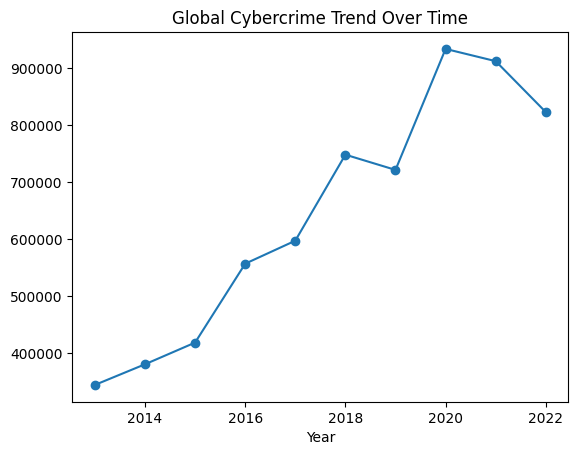

In [42]:
df_final_clean.groupby("Year")["Value"].sum().plot(kind="line", marker="o", title="Global Cybercrime Trend Over Time")

In [43]:
# Aggregate by country and year
cyber_by_country_year = df_final_clean.groupby(["Iso3_code", "Year"])["Value"].sum().reset_index()

# Make sure years are sorted and unique
years_sorted = sorted(cyber_by_country_year["Year"].unique())

fig = px.choropleth(
    cyber_by_country_year,
    locations="Iso3_code",
    color="Value",
    animation_frame="Year",
    color_continuous_scale="Viridis",
    title="Cybercrime Growth Over Time",
    category_orders={"Year": years_sorted},
)

fig.show()

## Cybercrime category

<Axes: title={'center': 'Cybercrime by Category'}, xlabel='Category'>

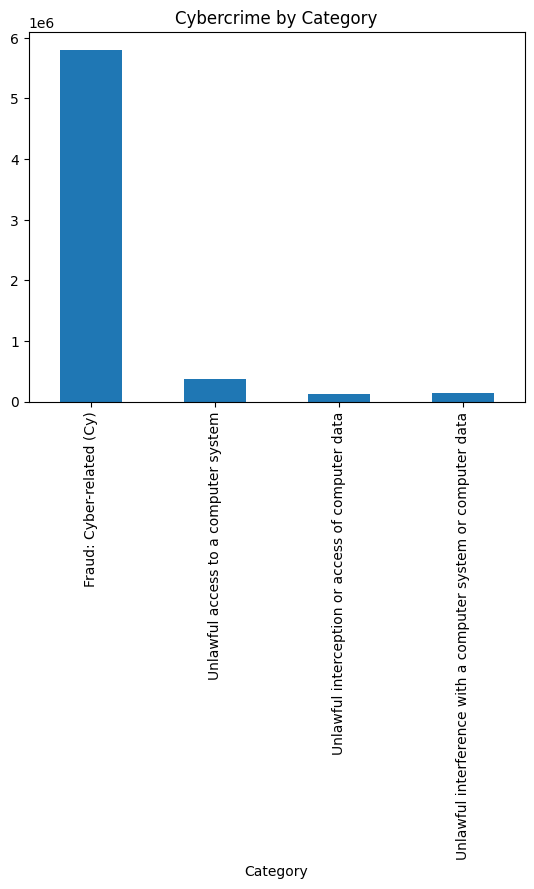

In [44]:
df_final_clean.groupby("Category")["Value"].sum().plot(kind="bar", title="Cybercrime by Category")

## Geographical analysis

Text(0.5, 1.0, 'Distribution of Cybercrime Reports by Region')

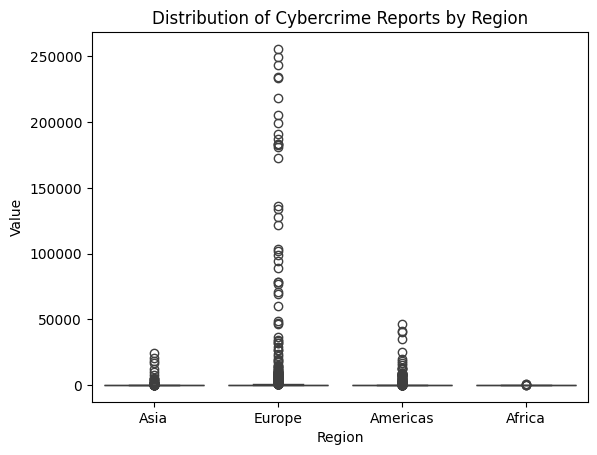

In [45]:
sns.boxplot(data=df_final_clean, x="Region", y="Value")
plt.title("Distribution of Cybercrime Reports by Region")

In [46]:
import plotly.express as px

# Aggregate by country
country_totals = df_final_clean.groupby("Iso3_code")["Value"].sum().reset_index()

# Plot
fig = px.choropleth(
    country_totals,
    locations="Iso3_code",
    color="Value",
    color_continuous_scale="Reds",
    projection="natural earth",
    title="Total Reported Cybercrime by Country"
)
fig.show()

Text(0.5, 1.02, 'Cybercrime Trends by Region')

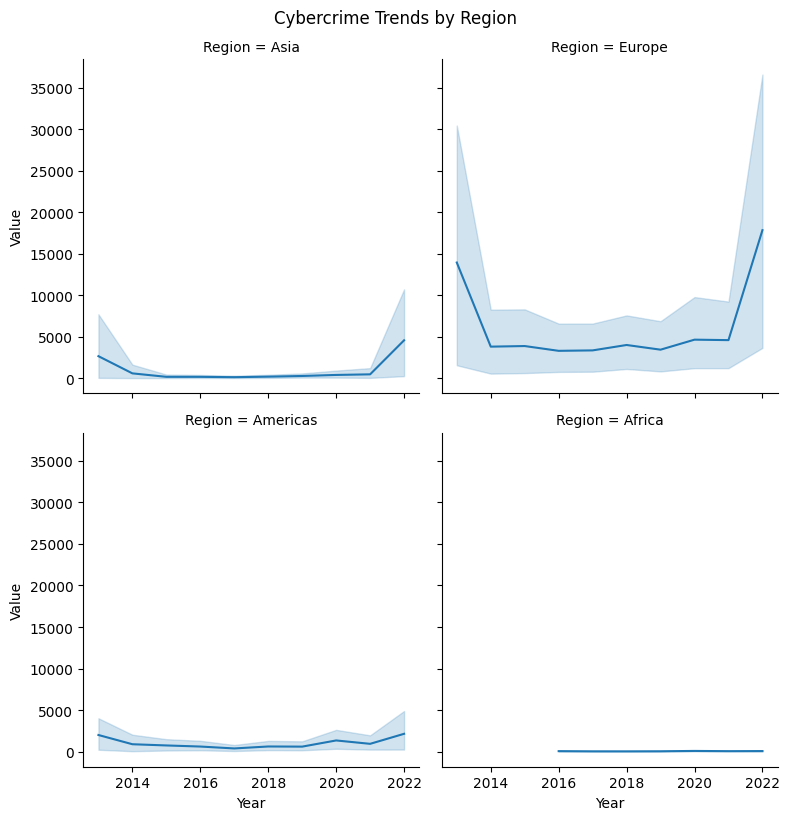

In [47]:
g = sns.FacetGrid(df_final_clean, col="Region", col_wrap=2, height=4)
g.map_dataframe(sns.lineplot, x="Year", y="Value")
g.fig.suptitle("Cybercrime Trends by Region", y=1.02)

Text(0.5, 1.0, 'Distribution of Cybercrime Reports by Region')

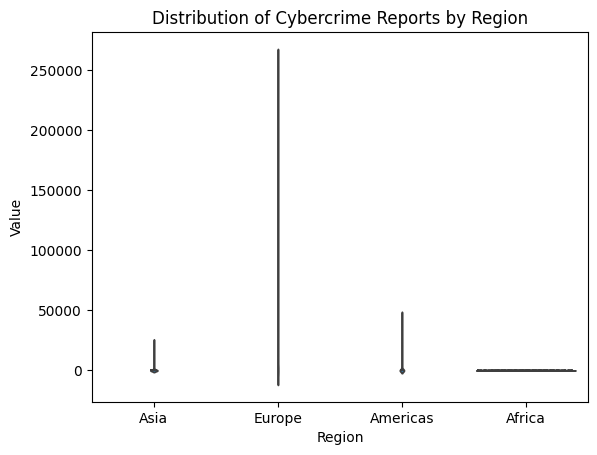

In [48]:
sns.violinplot(data=df_final_clean, x="Region", y="Value", inner="quartile")
plt.title("Distribution of Cybercrime Reports by Region")

## Correlations

<Axes: >

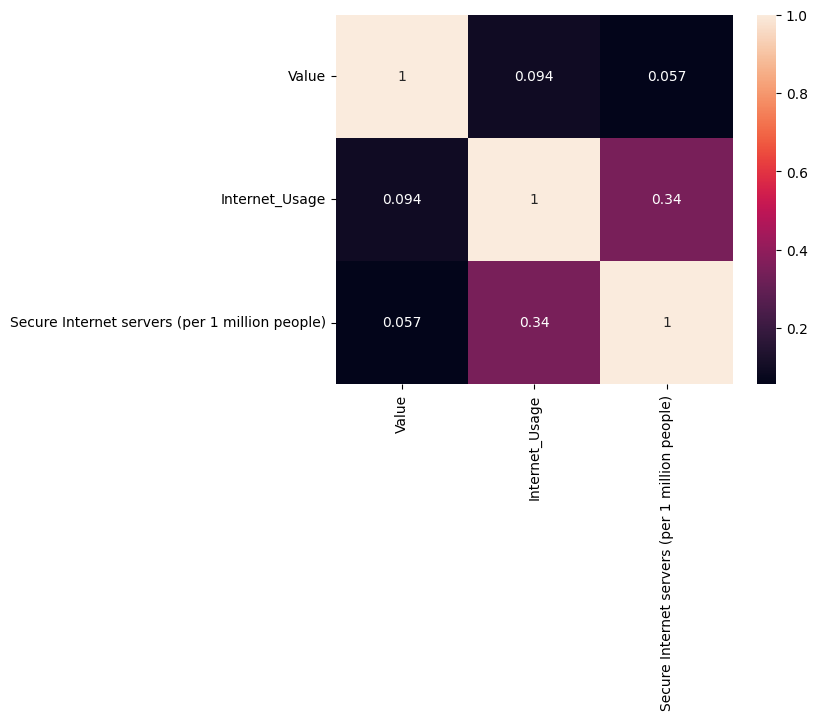

In [49]:
sns.heatmap(df_final_clean[["Value", "Internet_Usage",
                            "Secure Internet servers (per 1 million people)"]].corr(), annot=True)


Text(0.5, 1.0, 'Cybercrime vs. Internet Usage')

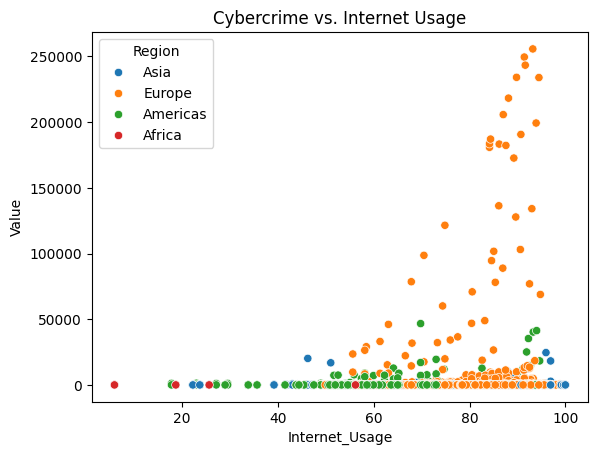

In [50]:
sns.scatterplot(data=df_final_clean, x="Internet_Usage", y="Value", hue="Region")
plt.title("Cybercrime vs. Internet Usage")

In [51]:
latest = df_final_clean[df_final_clean["Year"] == df_final_clean["Year"].max()]

fig = px.scatter(
    latest,
    x="Internet_Usage",
    y="Value",
    size="Secure Internet servers (per 1 million people)",
    color="Region",
    hover_name="Country",
    title="Cybercrime vs. Internet Usage (Bubble = Server Density)",
    size_max=60
)
fig.show()

## Groupings

<Axes: xlabel='Internet_Level', ylabel='Value'>

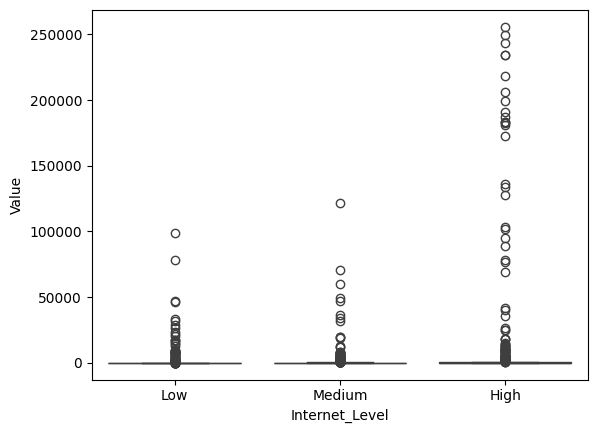

In [52]:
df_final_clean["Internet_Level"] = pd.qcut(df_final_clean["Internet_Usage"], q=3, labels=["Low", "Medium", "High"])
sns.boxplot(data=df_final_clean, x="Internet_Level", y="Value")

In [53]:
# Create one for counts
df_counts = df_final_clean[df_final_clean["Unit"] == "Counts"]

# Create one for rates
df_rates = df_final_clean[df_final_clean["Unit"] == "Rate per 100,000 population"]

# Merge them side-by-side on shared keys
df_combined = pd.merge(
    df_counts,
    df_rates,
    on=["Iso3_code", "Country", "Region", "Subregion", "Category", "Year"],
    suffixes=("_count", "_rate")
)

In [54]:
df_combined.columns

Index(['Iso3_code', 'Country', 'Region', 'Subregion', 'Category', 'Year',
       'Unit_count', 'Value_count', 'Source_count', 'Internet_Usage_count',
       'Secure Internet servers_count',
       'Secure Internet servers (per 1 million people)_count',
       'Internet_Level_count', 'Unit_rate', 'Value_rate', 'Source_rate',
       'Internet_Usage_rate', 'Secure Internet servers_rate',
       'Secure Internet servers (per 1 million people)_rate',
       'Internet_Level_rate'],
      dtype='object')

In [55]:
(df_combined["Internet_Usage_count"] == df_combined["Internet_Usage_rate"]).all()

np.True_

In [56]:
columns_to_drop = [
    'Unit_count', 'Source_count', 'Internet_Usage_count',
    'Secure Internet servers_count',
    'Secure Internet servers (per 1 million people)_count',
    'Internet_Level_count'
]

df_combined_clean = df_combined.drop(columns=columns_to_drop)

In [57]:
df_combined_clean.head()

,Iso3_code,Country,Region,Subregion,Category,Year,Value_count,Unit_rate,Value_rate,Source_rate,Internet_Usage_rate,Secure Internet servers_rate,Secure Internet servers (per 1 million people)_rate,Internet_Level_rate
0,ARM,Armenia,Asia,Western Asia,Fraud: Cyber-related (Cy),2013,35.0,"Rate per 100,000 population",1.206320,CTS,41.9000,158.0,52.283256,Low
1,AUT,Austria,Europe,Western Europe,Fraud: Cyber-related (Cy),2013,7667.0,"Rate per 100,000 population",90.417651,CTS,80.6188,15751.0,1857.468016,Medium
2,CAN,Canada,Americas,Northern America,Fraud: Cyber-related (Cy),2013,6914.0,"Rate per 100,000 population",19.718403,CTS,85.8000,82897.0,2363.017557,High
3,COL,Colombia,Americas,Latin America and the Caribbean,Fraud: Cyber-related (Cy),2013,7303.0,"Rate per 100,000 population",15.794392,CTS,51.7000,1923.0,41.667042,Low
4,CZE,Czechia,Europe,Eastern Europe,Fraud: Cyber-related (Cy),2013,1740.0,"Rate per 100,000 population",16.548492,CTS,74.1104,11354.0,1079.865539,Medium


In [58]:
df_combined_clean.rename(columns={
    "Value_count": "Reported_Cases",
    "Value_rate": "Cases_per_100k"
}, inplace=True)

# Follow up

In [59]:
europe_df = df_combined_clean[df_combined_clean["Region"] == "Europe"]

# Filter to Western Europe only
western_df = df_combined_clean[df_combined_clean["Subregion"] == "Western Europe"]

# Filter to just Germany + Austria + Poland
focus_countries = ["Germany", "Austria", "Poland"]
country_focus_df = df_combined_clean[df_combined_clean["Country"].isin(focus_countries)]

# Filter to Europe only
germany_df = df_combined_clean[df_combined_clean["Country"] == "Germany"]

## Regional analysis Europe

Text(0.5, 1.0, 'Cybercrime Rates per 100k in Europe by Subregion')

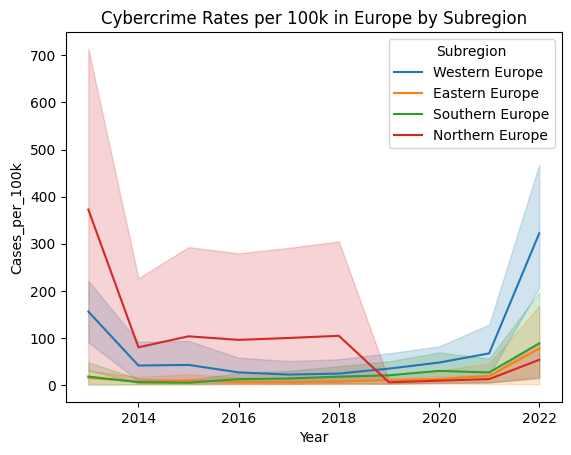

In [60]:

sns.lineplot(data=europe_df, x="Year", y="Cases_per_100k", hue="Subregion")
plt.title("Cybercrime Rates per 100k in Europe by Subregion")

Text(0.5, 1.0, 'Cybercrime Rate per Country in Western Europe')

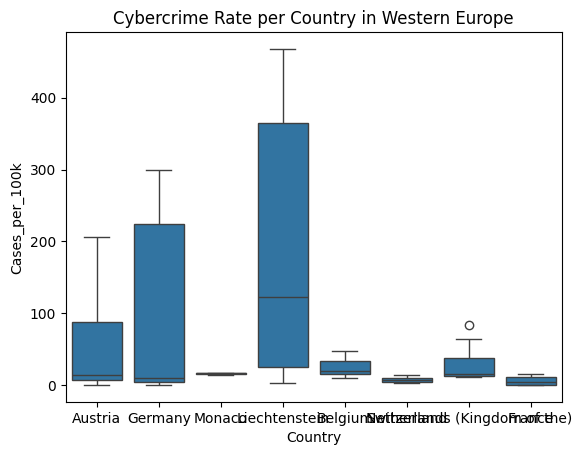

In [61]:
sns.boxplot(data=western_df, x="Country", y="Cases_per_100k")
plt.title("Cybercrime Rate per Country in Western Europe")

Text(0.5, 1.0, 'Cybercrime Rate per 100k: Germany vs Austria vs Poland')

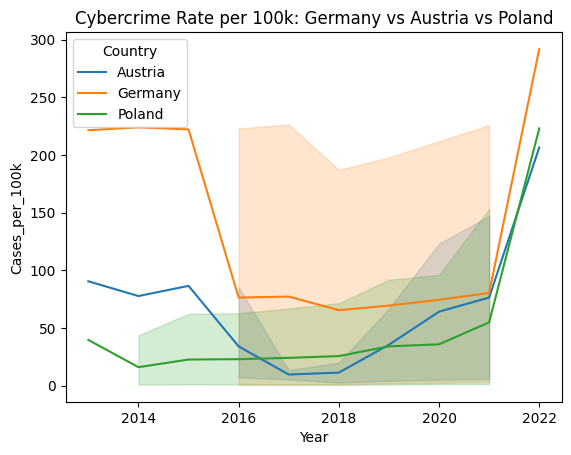

In [62]:
sns.lineplot(data=country_focus_df, x="Year", y="Cases_per_100k", hue="Country")
plt.title("Cybercrime Rate per 100k: Germany vs Austria vs Poland")

Text(0.5, 1.0, 'Cybercrime Rate per 100k: Germany')

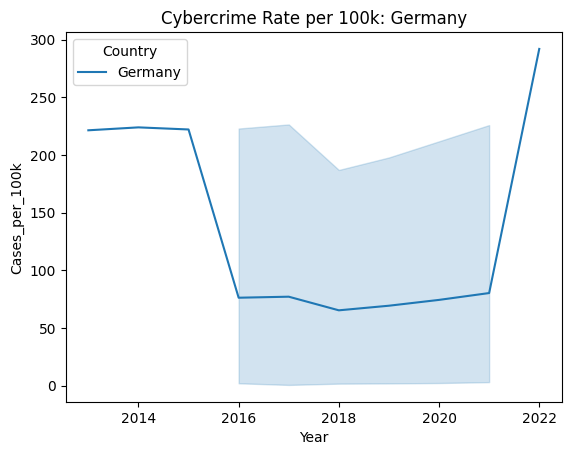

In [63]:
sns.lineplot(data=germany_df, x="Year", y="Cases_per_100k", hue="Country")
plt.title("Cybercrime Rate per 100k: Germany")

<Axes: title={'center': 'Cybercrime by Category'}, xlabel='Category'>

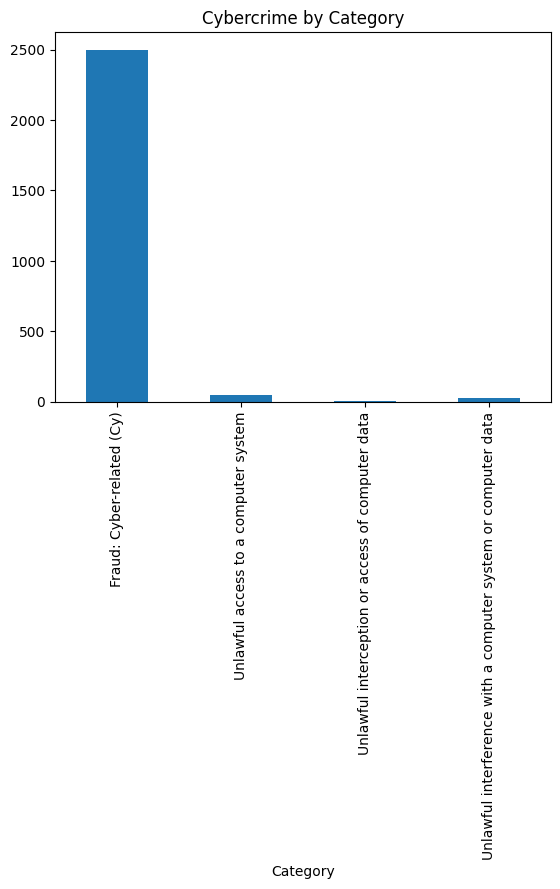

In [64]:
germany_df.groupby("Category")["Cases_per_100k"].sum().plot(kind="bar", title="Cybercrime by Category")

In [68]:
from ipywidgets import interact

# Function to plot trend for selected country
def plot_country_trend(country):
    country_df = df_final_clean[df_final_clean["Country"] == country]
    if not country_df.empty:
        country_df.groupby("Year")["Value"].sum().plot(kind="line", marker="o")
        plt.title(f"Cybercrime Trend Over Time in {country}")
        plt.ylabel("Reported Cases")
        plt.grid(True)
        plt.show()
    else:
        print("No data available for this country.")

# Create dropdown of available countries
interact(plot_country_trend, country=sorted(df_final_clean["Country"].unique()))

interactive(children=(Dropdown(description='country', options=('Albania', 'Algeria', 'Antigua and Barbuda', 'A…

<function __main__.plot_country_trend(country)>